In [ ]:
Данные имеют следующую структуру:
    записываются для каждого пользователя, совершившего покупки, каждый день
    для каждой даты есть своя папка, внутри неё – папки для каждого пользователя
    внутри каждой папки есть файл data.csv, где и хранятся данные

In [ ]:
Схематично выглядит так:

└── data
   ├── 2020-12-30
   │  ├── FirstName_LastName1
   │  │   └── data.csv
   │  ├── FirstName_LastName2
   │  │   └── data.csv
   │  └── FirstName_LastName3
   │      └── data.csv
   └── 2020-12-31
      ├── FirstName_LastName1
      │   └── data.csv
      └── FirstName_LastName5
          └── data.csv

#### Импорт необходимых библиотек

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import zipfile

%matplotlib inline 

### Вопрос 1: Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), имя пользователя (name), и дату этих покупок (date), соответствует названию папки, где лежит папка с пользователем). В качестве ответа укажите сумму по колонке quantity.

In [ ]:
os.listdir('/mnt/HC_Volume_18315164/home-jupyter/jupyter-t-pitsuev/Shared/homeworks/python_ds_miniprojects/4/data')

In [ ]:
# C помощью функции os.walk просматриваю поэтапно все подпапки и файлы в указанной в качестве параметра директории
tree=os.walk('/mnt/HC_Volume_18315164/home-jupyter/jupyter-t-pitsuev/Shared/homeworks/python_ds_miniprojects/4/data')


# path, directories (folders), files
for item in tree:
    print(item)

In [ ]:
tree=os.walk('/mnt/HC_Volume_18315164/home-jupyter/jupyter-t-pitsuev/Shared/homeworks/python_ds_miniprojects/4/data')
data_files=[]
target_file='data.csv'

# путь, папки, файлы
for item in tree:
    files=item[-1] #взяли последний элемент из кортежа выше
 
    # если папка содержит файлы и первый файл data.csv
    if len(files) > 0 and target_file in files:
        path=os.path.join(item[0],target_file)
        data_files.append(path)


In [ ]:
data_files

In [ ]:
data_files_df=[]
 
for path in data_files:
    df=pd.read_csv(path,index_col=0)
    
    # выбираем из названия пути только дату и имя
    date,name=path.split('/')[10:12]
    
    # добавляем к датафрейму столбцы date и name
    df['date']=date 
    df['name']=name
    
    data_files_df.append(df)

In [ ]:
data_files_df[0].head()

#### Объединение в один датафрейм

In [ ]:
data=pd.concat(data_files_df,ignore_index=True)

In [ ]:
data

In [ ]:
data.to_csv('unite_df')

In [4]:
df = pd.read_csv('C:/Users/Pizzu/DA_course/Python_projects/Product_sales_analysis/unite_df')

### Вопрос 2: Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.Например: Anatoly_Karpov, Nekto_Ktotovich, Lena_Uhanova, Ignat, Sasha_Tokarev

In [5]:
df.groupby('name', as_index = False).agg({'quantity':'sum'}).sort_values('quantity', ascending=False)

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


#### Ответ: Alexey_Smirnov, Petr_Smirnov

### Вопрос 3: Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот (столбчатую диаграмму, sns.barplot), где:
- по оси x – идентификаторы товаров (product_id)
- по оси y – суммарное число их покупок (сколько товаров с таким product_id было продано)

### Для практики попробуйте изменить параметры графика: цвет (color), прозрачность (alpha), сортировку значений по оси х (order). 


In [9]:
top_ten = df.groupby('product_id', as_index = False).agg({'quantity':'sum'}).sort_values('quantity', ascending=False).head(10)

In [10]:
top_ten

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


Text(0.5, 1.0, 'Топ-10 покупаемых товаров')

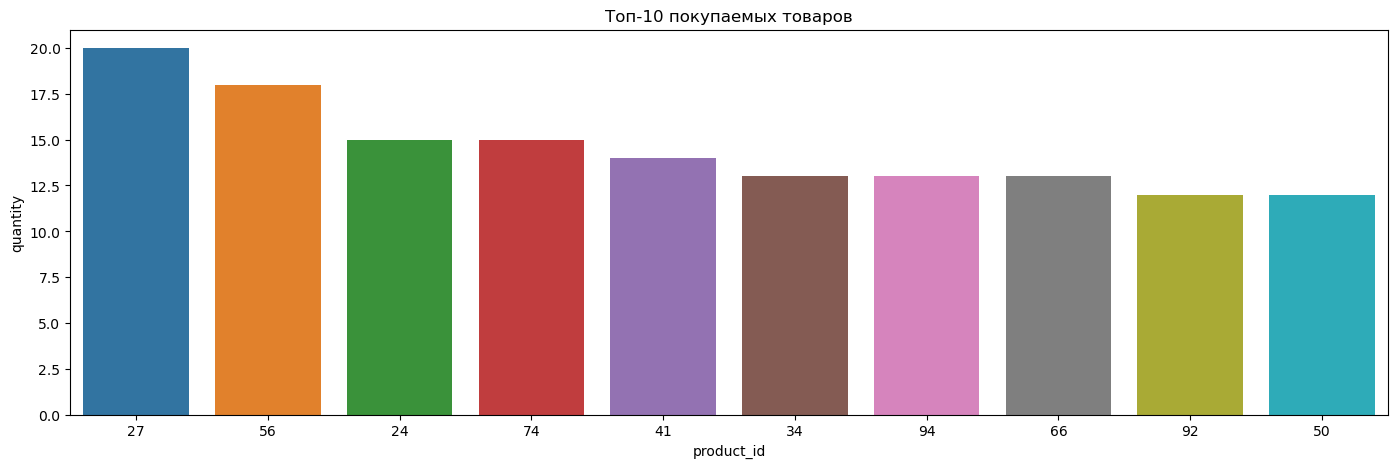

In [15]:
fig, ax = plt.subplots(figsize =(17, 5))
sns.barplot(data=top_ten, x='product_id',y='quantity',
           order=top_ten.sort_values('quantity',ascending=False).product_id, ax=ax)

ax.set_title('Топ-10 покупаемых товаров')

### Вопрос 4: Посмотрим на продажи по дням! Для визуализации снова используйте барплот, только теперь по оси x будут дни, по которым у нас есть данные (date). Верные утверждения:

In [21]:
top_days=df.groupby('date',as_index=False).quantity.sum().sort_values('date')

In [22]:
top_days

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


Text(0.5, 1.0, 'Покупки по дням')

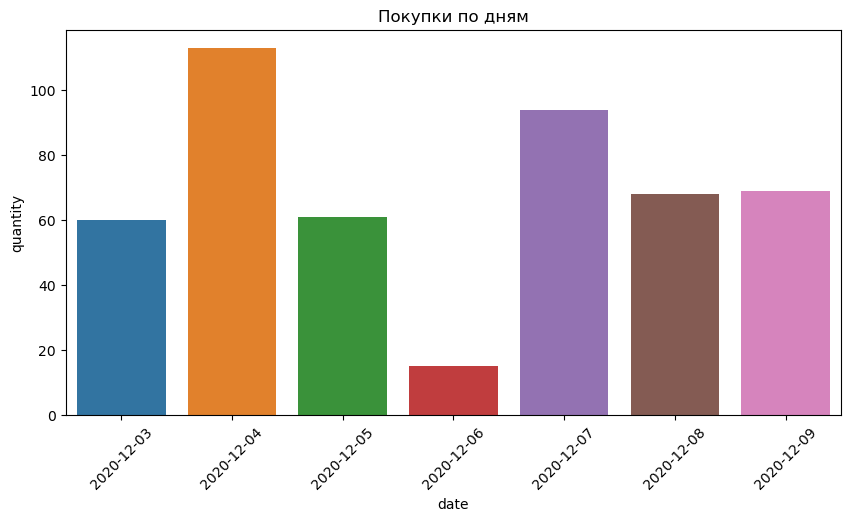

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=top_days, x='date',y='quantity')
ax.tick_params(axis='x',rotation=45)


ax.set_title('Покупки по дням') 


In [25]:
df.head()

,Unnamed: 0,product_id,quantity,date,name
0,0,27,4,2020-12-05,Petr_Ivanov
1,1,89,1,2020-12-05,Petr_Ivanov
2,2,33,2,2020-12-05,Petr_Ivanov
3,3,8,3,2020-12-05,Petr_Ivanov
4,4,16,1,2020-12-05,Petr_Ivanov


In [27]:
five_ex=df.groupby('date',as_index=False).quantity.sum()

Text(0.5, 1.0, 'Покупки по дням')

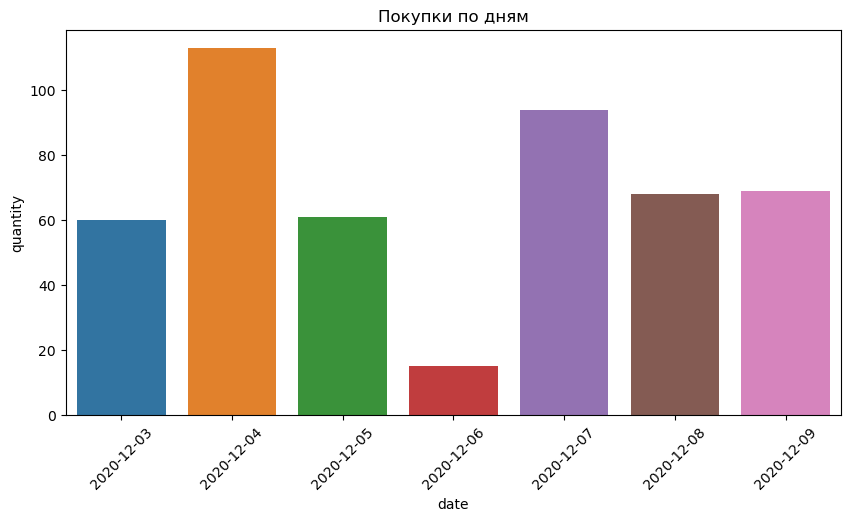

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=five_ex, x='date',y='quantity',
           order=five_ex.date,ax=ax)

ax.tick_params(axis='x',rotation=45) # сделали метки дат под наклоном
ax.set_title('Покупки по дням') # сделали заголовок для диаграммы 


#### Выводы: 

- 4 декабря было куплено почти в два раза больше товаров, чем в предыдущий день
- Меньше всего товаров было приобретено 6 декабря
- Максимальное число товаров было продано 4 декабря
- 8 и 9 декабря было продано примерно одинаковое число товаров

### Вопрос 5: Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 


#### Удалил дубликаты, строки в которых все значения совпадают

In [31]:
df.drop_duplicates()

,Unnamed: 0,product_id,quantity,date,name
0,0,27,4,2020-12-05,Petr_Ivanov
1,1,89,1,2020-12-05,Petr_Ivanov
2,2,33,2,2020-12-05,Petr_Ivanov
3,3,8,3,2020-12-05,Petr_Ivanov
4,4,16,1,2020-12-05,Petr_Ivanov
...,...,...,...,...,...
156,156,18,4,2020-12-07,Petr_Fedorov
157,157,94,4,2020-12-07,Petr_Fedorov
158,158,95,2,2020-12-07,Vasiliy_Ivanov
159,159,83,3,2020-12-07,Vasiliy_Ivanov


In [32]:
df.groupby(['name','product_id']).date.nunique().sort_values(ascending=False)

name            product_id
Anton_Ivanov    15            2
Petr_Fedorov    94            2
Alexey_Fedorov  13            1
Petr_Smirnov    21            1
Petr_Petrov     64            1
                             ..
Anton_Smirnov   28            1
                33            1
                34            1
                40            1
Vasiliy_Petrov  78            1
Name: date, Length: 158, dtype: int64

In [33]:
unique_prod=df.groupby(['name','product_id']).date.nunique().sort_values(ascending=False)

In [34]:
unique_prod

name            product_id
Anton_Ivanov    15            2
Petr_Fedorov    94            2
Alexey_Fedorov  13            1
Petr_Smirnov    21            1
Petr_Petrov     64            1
                             ..
Anton_Smirnov   28            1
                33            1
                34            1
                40            1
Vasiliy_Petrov  78            1
Name: date, Length: 158, dtype: int64

In [35]:
unique_prod.loc[unique_prod>1]

name          product_id
Anton_Ivanov  15            2
Petr_Fedorov  94            2
Name: date, dtype: int64

#### Ответ: 2 пользователя